In [ ]:
# Needs plotly and geopandas

In [16]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import io
import os
data = pd.read_csv('elasticnet_county_only_risks.csv')
data = data.drop(columns = 'Unnamed: 0')
data.head()

,smoking_tr,obesity,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr,pollution,diabetes,sunlight
0,2.204549,0.763336,-0.038839,-0.024337,0.032570,-0.011862,-0.044527,1.134440,0.034633
1,2.043763,0.765595,-0.038358,-0.023173,0.048276,-0.017119,-0.044667,1.243110,0.026618
2,2.089134,0.735234,-0.039962,-0.019650,0.037585,-0.022331,-0.042148,1.201018,0.024090
3,1.977445,0.735499,-0.044594,-0.021333,0.044897,-0.021226,-0.037713,1.308477,0.024732
4,1.875399,0.705482,-0.036222,-0.027196,0.040196,-0.015823,-0.044666,1.101617,0.025833


In [11]:
odata = pd.read_csv('ols_county_only_risks.csv')
odata = odata.drop(columns = 'Unnamed: 0')
odata.head()

,smoking_tr,obesity,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr,pollution,diabetes,sunlight
0,2.208467,0.844523,-0.041049,-0.013900,0.041960,-0.024875,-0.037840,1.097627,0.029077
1,2.208467,0.844523,-0.041049,-0.013900,0.041960,-0.024875,-0.037840,1.097627,0.029077
2,2.347639,0.725666,-0.048280,-0.019329,0.033783,-0.013961,-0.044852,1.217954,0.034147
3,2.205839,0.733915,-0.046682,-0.025589,0.045287,-0.013014,-0.043164,1.159065,0.031894
4,2.326944,0.728121,-0.039349,-0.029340,0.028887,-0.019649,-0.049726,0.920374,0.031958


In [13]:
data.describe()

,smoking_tr,obesity,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr,pollution,diabetes,sunlight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.102046,0.737907,-0.040387,-0.024174,0.040592,-0.016488,-0.042599,1.148446,0.028049
std,0.130997,0.062416,0.003652,0.004113,0.008791,0.005167,0.003093,0.118449,0.004160
min,1.695821,0.590473,-0.050644,-0.034031,0.019069,-0.027666,-0.052209,0.886410,0.017982
25%,2.005468,0.704608,-0.042864,-0.026574,0.035032,-0.020606,-0.044566,1.064030,0.025753
50%,2.106295,0.739677,-0.039793,-0.023923,0.040799,-0.017119,-0.042278,1.161119,0.027113
75%,2.211637,0.778395,-0.038395,-0.021741,0.044908,-0.012953,-0.040383,1.247072,0.031318
max,2.377626,0.882590,-0.032003,-0.013172,0.065871,-0.000786,-0.036289,1.402366,0.041205


In [14]:
odata.describe()

,smoking_tr,obesity,foodenv_tr,gauss_exercise,noinsurance_tr,physicians_tr,pollution,diabetes,sunlight
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.308521,0.763228,-0.040160,-0.023274,0.039626,-0.017098,-0.044467,1.059855,0.032070
std,0.133960,0.079028,0.004548,0.005802,0.009922,0.005723,0.003919,0.148562,0.004784
min,1.957059,0.580449,-0.051257,-0.040049,0.010431,-0.029158,-0.054629,0.581747,0.018266
25%,2.209450,0.718450,-0.043078,-0.027191,0.033783,-0.021450,-0.046768,0.953148,0.029061
50%,2.298313,0.771380,-0.039824,-0.022990,0.040043,-0.016798,-0.044267,1.076079,0.031394
75%,2.400680,0.821871,-0.037813,-0.019329,0.045479,-0.012942,-0.041903,1.144452,0.035199
max,2.646044,0.940864,-0.026756,-0.011892,0.061574,-0.003079,-0.034954,1.368586,0.042969


In [2]:
import getpass

def GetCreds():
    plotlyUSER = getpass.getpass(prompt="Please enter your plotly username: ")
    plotlyKEY = getpass.getpass(prompt="Please enter your plotly API key: ")
    return plotlyUSER, plotlyKEY

plotlyUSER, plotlyKEY = GetCreds()

Please enter your plotly username: ········
Please enter your plotly API key: ········


In [7]:
plotly.__version__

'3.7.0'

In [24]:
list(data.columns.values)

['smoking_tr',
 'obesity',
 'foodenv_tr',
 'gauss_exercise',
 'noinsurance_tr',
 'physicians_tr',
 'pollution',
 'diabetes',
 'sunlight']

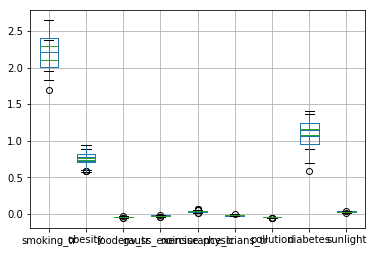

In [25]:
fig, ax = plt.subplots(1,1)
data.boxplot(column=list(data.columns.values),ax=ax)
odata.boxplot(column=list(odata.columns.values),ax=ax)

Outliers are not really an issue here, check normality of data ...

In [31]:
norm_char = pd.DataFrame({'ENE Kurtosis':data.kurtosis(),'ENE Skew':data.skew(),'OLSE Kurtosis':odata.kurtosis(),
                         'OLSE Skew':odata.skew()})
norm_char

,ENE Kurtosis,ENE Skew,OLSE Kurtosis,OLSE Skew
smoking_tr,-0.118552,-0.160837,-0.060779,0.067407
obesity,0.022472,-0.265382,-0.506938,-0.220807
foodenv_tr,0.116202,-0.400581,0.161111,0.082276
gauss_exercise,-0.005908,-0.143991,-0.012828,-0.382937
noinsurance_tr,0.624896,0.381484,0.130507,-0.064017
physicians_tr,0.129169,0.610990,-0.525497,0.018998
pollution,0.119598,-0.275793,0.253686,-0.380326
diabetes,-0.572282,-0.015477,0.571965,-0.298128
sunlight,0.170418,0.362799,-0.107623,0.094164


All of these are reasonably close to normal distributions, so we can just use means and standard deviations ...

In [42]:
# Construct bar graph
data = [
    go.Bar(
        x=list(data.columns.values), # assign x as the dataframe column 'x'
        y=list(data.mean().values),
        name='Elastic Net Ensemble'
    ),
    go.Bar(
        x=list(data.columns.values),
        y=list(odata.mean().values),
        name='Ordinary Least Squares Ensemble'
    )
]


layout = go.Layout(
    barmode='group',
    title='Age-Adjusted Mortality Risk Impacts'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-bar-chart-layout')

url = py.plot(data, filename='age-adjusted-cardiovascular-mortality-risk-impacts')
img_bytes = pio.to_image(fig, format='svg', width=1200, height=700, scale=1)

In [33]:

with open('sunlight.svg', 'wb') as f:
    f.write(img_bytes)

In [39]:
list(data.mean().values + 1)

[3.1020458738068863,
 1.7379068149972854,
 0.9596134335159415,
 0.9758263846326927,
 1.040591615118045,
 0.9835124919020221,
 0.9574010923054826,
 2.148445701862186,
 1.0280489919505291]

I am not really happy with what Plotly can do in this case, so I am going to start a new notebook with Matplotlib...